In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('models-block-0.txt', 'r') as f:
    model = f.readlines()
for row in range(len(model)):
    model[row] = list(filter(str.strip,model[row].split(' ')))
    
#creates dictionary[model galaxy id][value/filter name]
#returns photometry or sfr/Mstar for modeled galaxies
model_dict = {}
for row in model[1:]:
    model_dict[row[0]] = {}
    for i,item in enumerate(row):
        model_dict[row[0]][model[0][i]] = float(item)

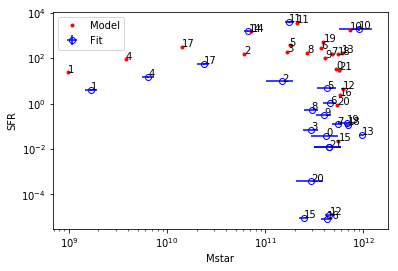

In [36]:
# PLOT

path="LW50250850"

with open(path+"/results.txt") as f:
    fit = f.readlines()
for row in range(len(fit)):
    fit[row] = list(filter(str.strip,fit[row].split(' ')))

#creates dictionary[fitted galaxy id][value/filter name]
#returns photometry or sfr/Mstar for modeled galaxies
fit_dict = {}
for row in fit[1:]:
    fit_dict[row[0]] = {}
    for i,item in enumerate(row):
        fit_dict[row[0]][fit[0][i]] = float(item)

plt.ylabel("SFR")
plt.xlabel("Mstar")
for i,g_id in enumerate(fit_dict.keys()):
    plt.loglog(model_dict[g_id]['stellar.m_star'],model_dict[g_id]['sfh.sfr'],'r.')
    plt.errorbar(fit_dict[g_id]['bayes.stellar.m_star'],fit_dict[g_id]['bayes.sfh.sfr'],
                 xerr=fit_dict[g_id]['bayes.stellar.m_star_err'],yerr=fit_dict[g_id]['bayes.sfh.sfr_err'],
                 markerfacecolor='None',marker='o',markeredgecolor='b',ls='',c='b')
    plt.annotate(i, (model_dict[g_id]['stellar.m_star'],model_dict[g_id]['sfh.sfr']))
    plt.annotate(i, (fit_dict[g_id]['bayes.stellar.m_star'],fit_dict[g_id]['bayes.sfh.sfr']))
plt.loglog(model_dict[g_id]['stellar.m_star'],model_dict[g_id]['sfh.sfr'],'r.',label="Model")
plt.errorbar(fit_dict[g_id]['bayes.stellar.m_star'],fit_dict[g_id]['bayes.sfh.sfr'],
                 xerr=fit_dict[g_id]['bayes.stellar.m_star_err'],yerr=fit_dict[g_id]['bayes.sfh.sfr_err'],
                 markerfacecolor='None',marker='o',markeredgecolor='b',ls='',c='b',label="Fit")
plt.legend()
plt.savefig(path+"/compare1_"+path,dpi=500)

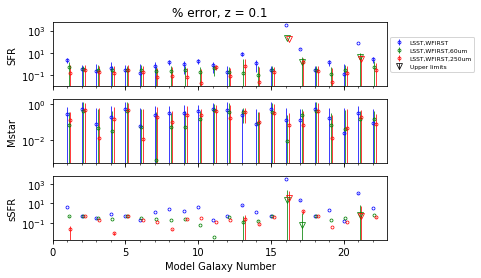

In [28]:
combos = ['LSST,WFIRST','LSST,WFIRST,60um','LSST,WFIRST,250um','LSST,WFIRST,850um','LSST,WFIRST,60um,250um,850um']
paths = ['LW','LW50','LW250']#,'LW850','LW50250850']
colors = ['b','g','r','y']
offset = [0.,.1,.2,.3]

fig, ax = plt.subplots(nrows=3, ncols=1,sharex=True)
ax[0].set_title("% error, z = 0.1")
ax[0].set_ylabel("SFR")
ax[1].set_ylabel("Mstar")
ax[2].set_ylabel("sSFR")
ax[2].set_xlabel("Model Galaxy Number")
ax[0].plot(range(-1,32,1),[0]*33,'k--',alpha=0.5)
ax[1].plot(range(-1,32,1),[0]*33,'k--',alpha=0.5)
ax[2].plot(range(-1,32,1),[0]*33,'k--',alpha=0.5)


for title,path in enumerate(paths):
    with open(path+"/results.txt") as f:
        fit = f.readlines()
    for row in range(len(fit)):
        fit[row] = list(filter(str.strip,fit[row].split(' ')))

        #creates dictionary[fitted galaxy id][value/filter name]
    #returns photometry or sfr/Mstar for modeled galaxies
    fit_dict = {}
    for row in fit[1:]:
        fit_dict[row[0]] = {}
        for i,item in enumerate(row):
            fit_dict[row[0]][fit[0][i]] = float(item)

    gal_count = 1
    for g_id in fit_dict.keys():
        ID = gal_count
        gal_count += 1
        model_m = float(model_dict[g_id]['stellar.m_star'])
        model_sfr = float(model_dict[g_id]['sfh.sfr'])
        model_ssfr = model_sfr / model_m
        fit_m = float(fit_dict[g_id]['bayes.stellar.m_star'])
        fit_m_err = float(fit_dict[g_id]['bayes.stellar.m_star_err'])/fit_m
        fit_sfr = float(fit_dict[g_id]['bayes.sfh.sfr'])
        fit_sfr_err = float(fit_dict[g_id]['bayes.sfh.sfr_err'])/fit_sfr
        fit_ssfr = fit_sfr / fit_m
        fit_ssfr_err = fit_ssfr * np.sqrt(((fit_sfr_err/fit_sfr)**2)+((fit_m_err/fit_m)**2))/model_ssfr

        flag1 = False
        flag2 = False
        if(fit_sfr_err>fit_sfr): #upper limit
            flag1 = True
            ax[0].errorbar(ID+offset[title],abs(fit_sfr-model_sfr+fit_sfr_err)/model_sfr,yerr=fit_sfr_err,c=colors[title],
                           marker='v',markerfacecolor='None',ls='',mew=.75,elinewidth=.75)
        else:
            ax[0].errorbar(ID+offset[title],abs(fit_sfr-model_sfr)/model_sfr,yerr=fit_sfr_err,c=colors[title],
                           marker='.',markerfacecolor='None',ls='',mew=.75,elinewidth=.75)
        if(fit_m_err>fit_m): #upper limit
            flag2 = True
            ax[1].errorbar(ID+offset[title],abs(fit_m-model_m+fit_m_err)/model_m,yerr=fit_m_err,c=colors[title],
                           marker='v',ms=5,markerfacecolor='None',ls='',mew=.75,elinewidth=.75)
        else:
            ax[1].errorbar(ID+offset[title],abs(fit_m-model_m)/model_m,yerr=fit_m_err,c=colors[title],
                           marker='.',markerfacecolor='None',ls='',mew=.75,elinewidth=.75)
        if(flag1 or flag2): #upper limit
            ax[2].errorbar(ID+offset[title],abs(fit_ssfr-model_ssfr)/model_ssfr,yerr=fit_ssfr_err,c=colors[title],
                           marker='v',markerfacecolor='None',ls='',mew=.75,elinewidth=.75)
        elif(flag1 & flag2): #not constrained
            ax[2].errorbar(ID+offset[title],abs(fit_ssfr-model_ssfr)/model_ssfr,yerr=fit_ssfr_err,c=colors[title],
                           marker='+',markerfacecolor='None',ls='',mew=.75,elinewidth=.75)
        else:
            ax[2].errorbar(ID+offset[title],abs(fit_ssfr-model_ssfr)/model_ssfr,yerr=fit_ssfr_err,c=colors[title],
                           marker='.',markerfacecolor='None',ls='',mew=.75,elinewidth=.75)

    ax[0].errorbar(-100,0,yerr=0,c=colors[title],
                           marker='.',markerfacecolor='None',ls='',mew=.75,elinewidth=.75,label=combos[title])

ax[0].errorbar(-100,0,yerr=0,c='k',marker='v',markerfacecolor='None',ls='',
               mew=.75,elinewidth=.75,label="Upper limits")
ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

ax[0].set_xlim(0,gal_count)
ax[0].set_xticks(range(0,gal_count,1),range(0,gal_count,1))
lgd = ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=6)
plt.savefig("compare_all",bbox_extra_artists=(lgd,), bbox_inches='tight',dpi=500)